In [7]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

# Plotting style
#monochrome color map
monochrome = (cycler('color', ['k']) * cycler('marker', ['', '.']) *
              cycler('linestyle', ['-', '--', ':', '-.']))
plt.rc('axes', prop_cycle=monochrome)
# Fonts
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica Neue"],
    "font.size": 28,
    })

In [8]:
def loss_fn(X, Y, beta):
    return cp.sum_squares(X @ beta - Y)


def regularizer(beta):
    return cp.sum_squares(beta)


def objective_fn(X, Y, beta, lambd):
    return loss_fn(X, Y, beta) + lambd * regularizer(beta)


def mse(X, Y, beta):
    return (1.0 / X.shape[0]) * loss_fn(X, Y, beta).value


def generate_data(m=100, n=20, sigma=5):
    "Generates data matrix X and observations Y."
    np.random.seed(1)
    beta_star = np.random.randn(n)
    # Generate an ill-conditioned data matrix
    X = np.random.randn(m, n)
    # Corrupt the observations with additive Gaussian noise
    Y = X.dot(beta_star) + np.random.normal(0, sigma, size=m)
    return X, Y

In [15]:
# Generate problem data
m = 100
n = 8
sigma = 5

X, Y = generate_data(m, n, sigma)
X_train = X[:50, :]
Y_train = Y[:50]
X_test = X[50:, :]
Y_test = Y[50:]

In [16]:
beta = cp.Variable(n)
lambd = cp.Parameter(nonneg=True)
problem = cp.Problem(cp.Minimize(objective_fn(X_train, Y_train, beta, lambd)))

lambd_values = np.logspace(-2, 3, 50)
train_errors = []
test_errors = []
beta_values = []
for v in lambd_values:
    lambd.value = v
    problem.solve()
    train_errors.append(mse(X_train, Y_train, beta))
    test_errors.append(mse(X_test, Y_test, beta))
    beta_values.append(beta.value)

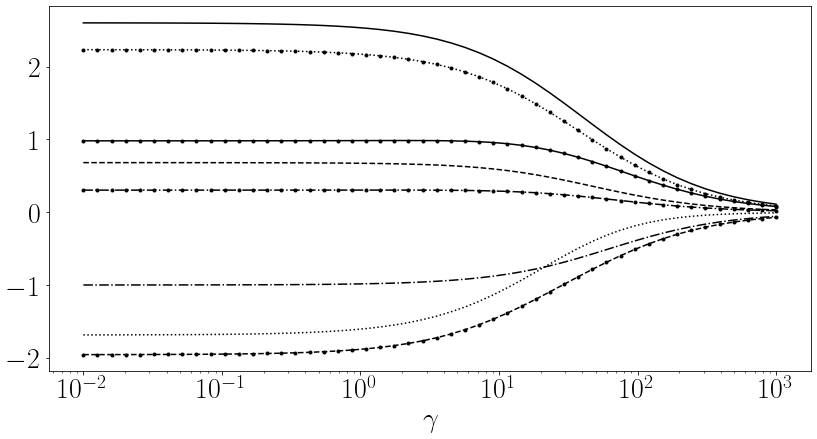

In [17]:
num_coeffs = len(beta_values[0])
fig, ax = plt.subplots(figsize=(12, 6.75))
for i in range(num_coeffs):
    ax.plot(lambd_values, [wi[i] for wi in beta_values])
ax.set_xlabel(r"$\gamma$")
ax.set_xscale("log")
plt.tight_layout()
plt.savefig("ridge.pdf")